### Install libs

In [ ]:
%pip install -r requirements.txt

### Loading the dataset

In [80]:
import os
import json
import zipfile

In [3]:
# Create a directory to store the data
os.mkdir("kaggle") 

In [2]:
# Download the data
os.environ['KAGGLE_USERNAME'] = json.load(open("kaggle/kaggle.json"))['username'] 
os.environ['KAGGLE_KEY'] = json.load(open("kaggle/kaggle.json"))['key']
!kaggle datasets download -d padmapriyatr/netflix-titles


  0%|          | 0.00/1.34M [00:00<?, ?B/s]
 75%|███████▍  | 1.00M/1.34M [00:00<00:00, 2.05MB/s]
100%|██████████| 1.34M/1.34M [00:00<00:00, 2.57MB/s]


In [3]:
# Unzip the data
with zipfile.ZipFile("netflix-titles.zip", 'r') as zip_ref: 
    zip_ref.extractall("kaggle")
os.remove("netflix-titles.zip")                             

### Испортируем библиотеки и начинаем анализировать датасет

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [76]:
# Read the data
netflix_overall = pd.read_csv("kaggle/netflix_titles.csv")
netflix_overall.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [79]:
netflix_shows = netflix_overall[netflix_overall['type'] =='TV Show']
netflix_movies = netflix_overall[netflix_overall['type'] =='Movie']

###  Analysis of Movies и TV Shows.

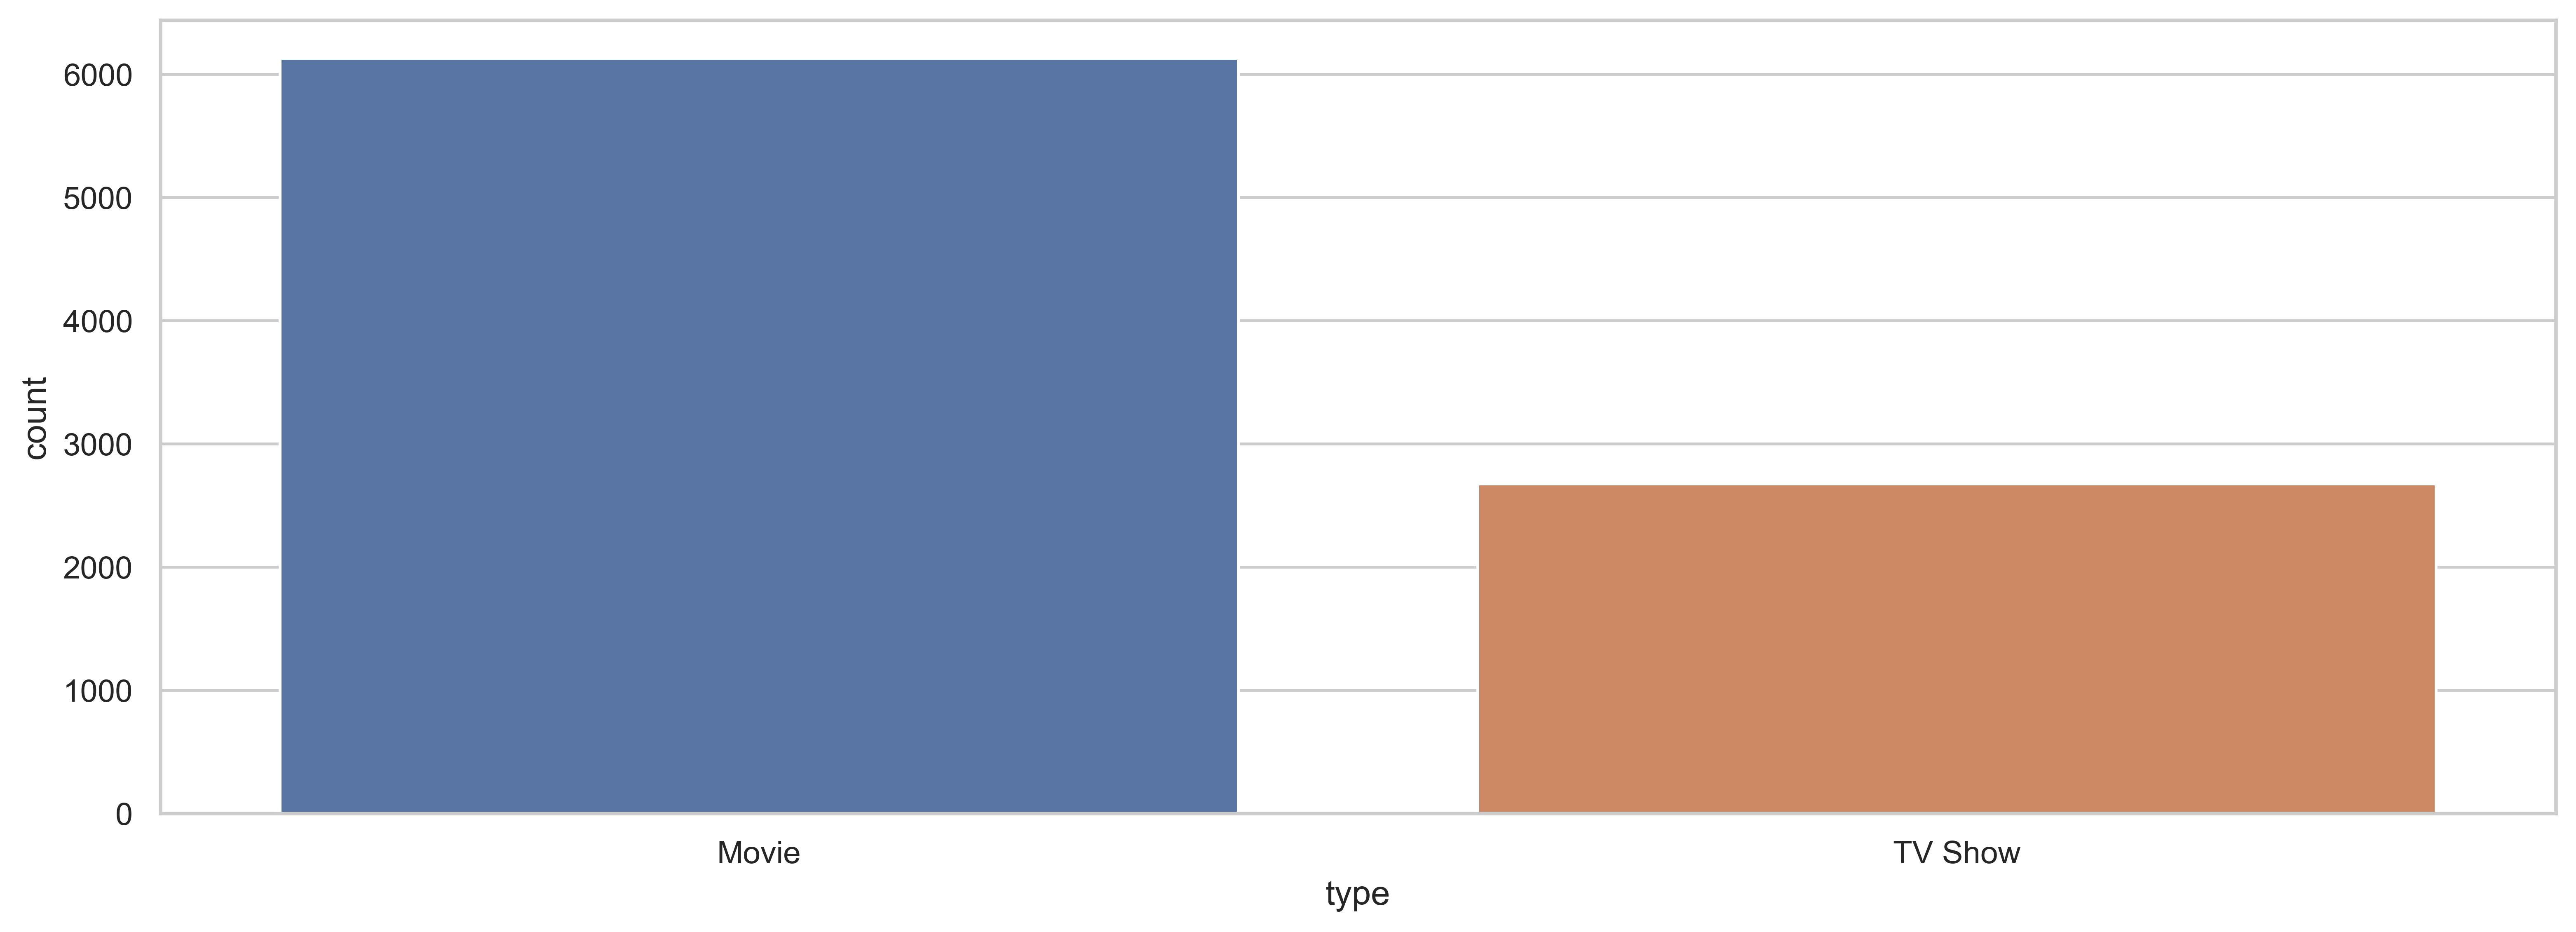

In [81]:
plt.figure(figsize=(15, 5), dpi=500)                             # Set the size of the figure                           
sns.set_style('whitegrid')                                       # Set the style of the plot                                                                    
m_tv = sns.countplot(x="type", data=netflix_overall, hue="type") # Create the plot  

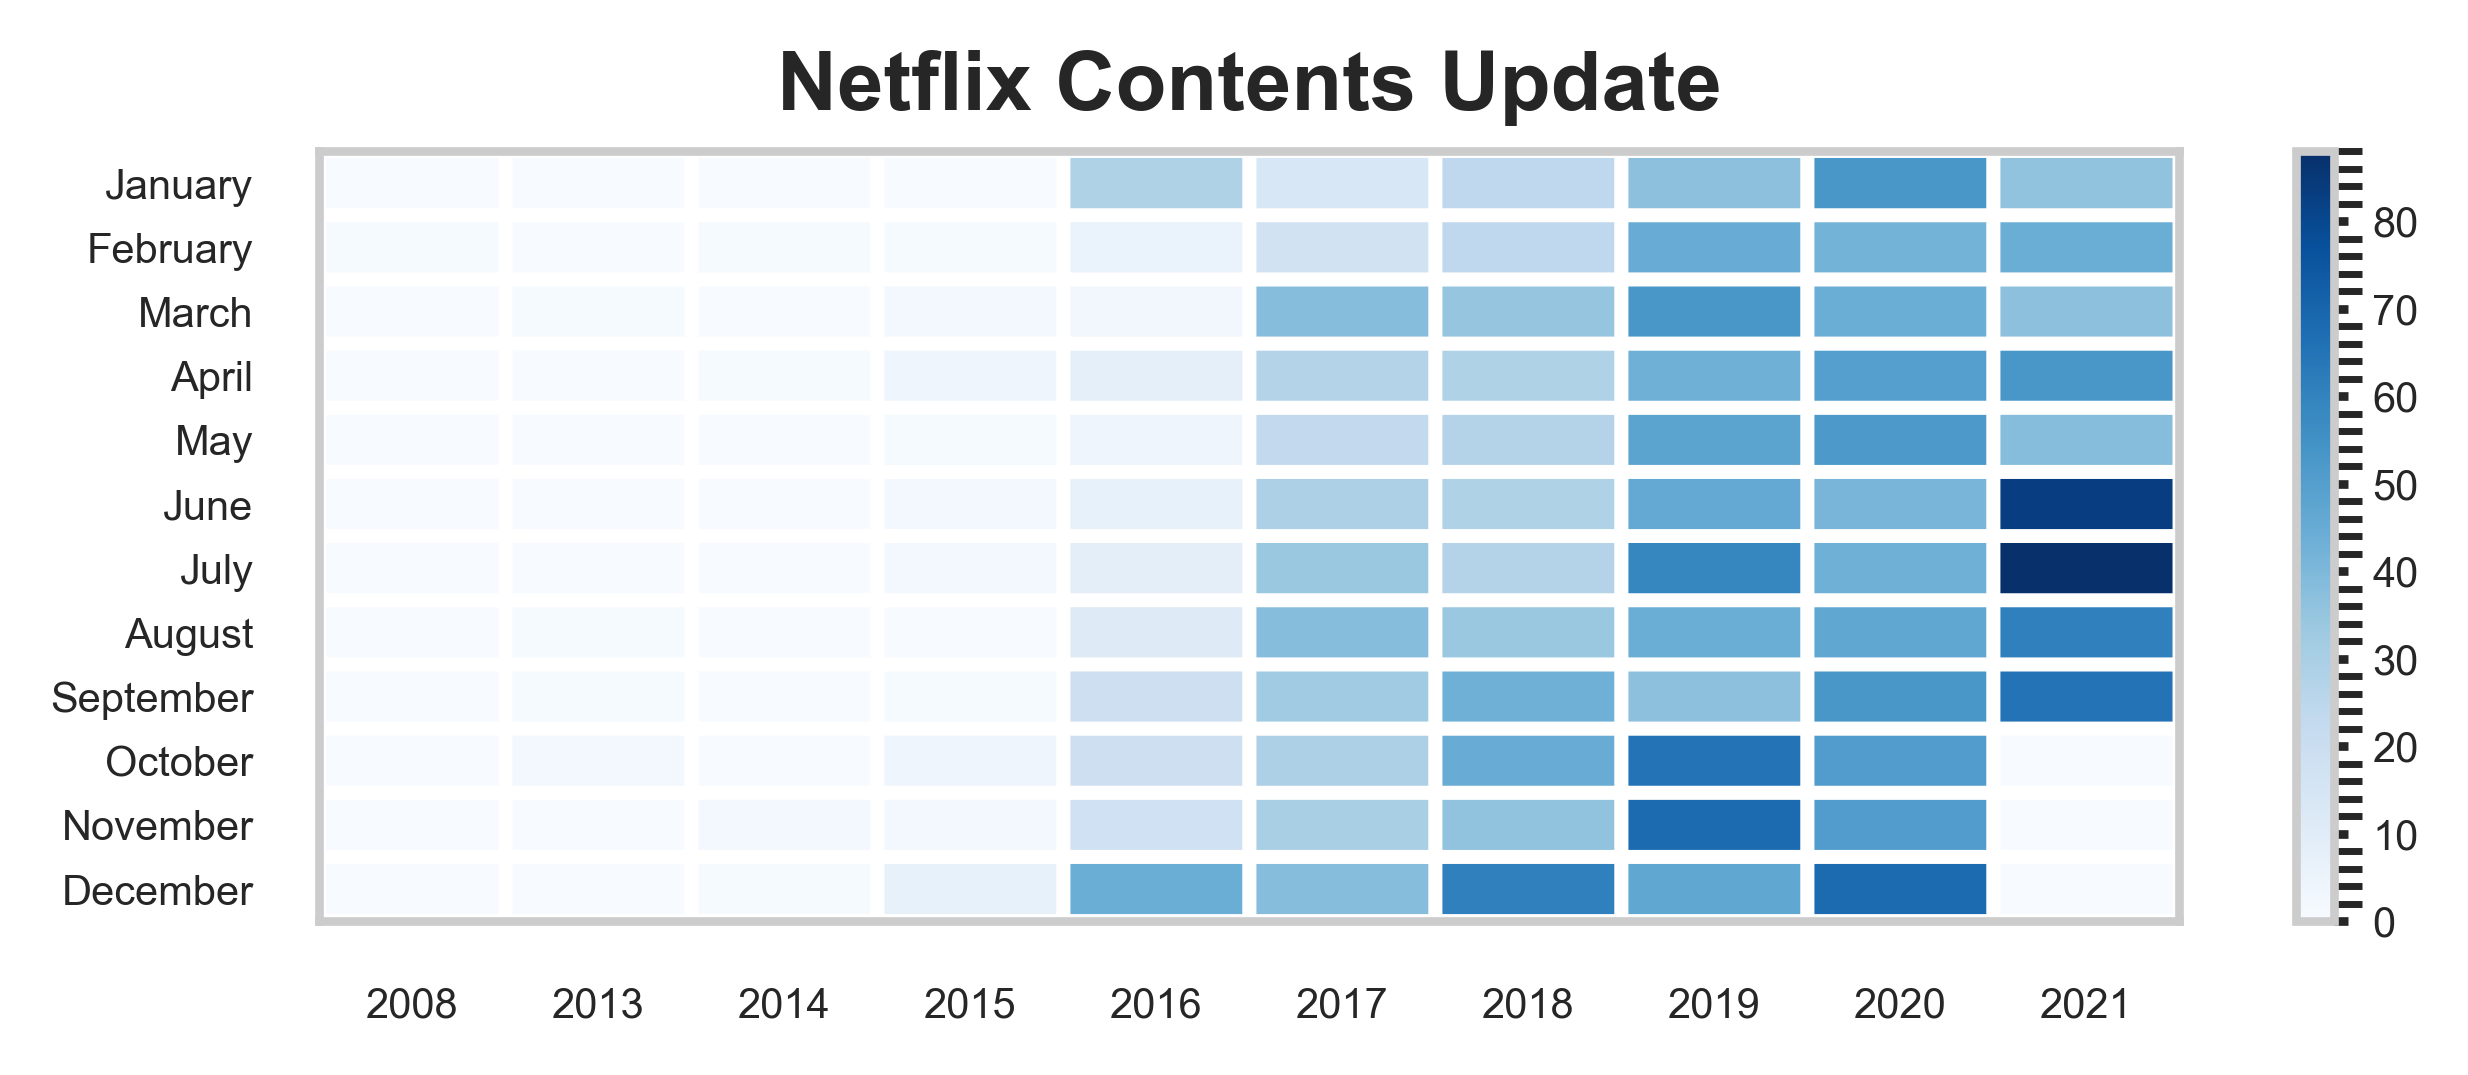

In [83]:
netflix_date = netflix_shows[['date_added']].dropna()                                          # Drop the missing values
netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])          # Extract the year
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])  # Extract the month

month_order = ['January', 'February', 'March', 'April', 
               'May', 'June', 'July', 'August', 
               'September', 'October', 'November', 'December'][::-1]                           # Set the order of the month
df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T   # Create the dataframe

plt.figure(figsize=(6, 2), dpi=500)                                                            # Set the size of the figure
plt.pcolor(df, cmap="Blues", edgecolors='white', linewidths=2)                                 # Create the heatmap
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns, fontsize=6, fontfamily='Arial')     # Set the x-ticks
plt.yticks(np.arange(0.5, len(df.index), 1), df.index, fontsize=6, fontfamily='Arial')         # Set the y-ticks

plt.title('Netflix Contents Update', fontsize=12, fontfamily='Arial', fontweight='bold')       # Set the title
cbar = plt.colorbar()                                                                          # Create the colorbar

cbar.ax.tick_params(labelsize=6, length=2)                                                     # Set the tick size
cbar.ax.minorticks_on()                                                                        # Set the minor ticks
plt.show()                                                                                     # Show the plot

# Movie ratings analysis

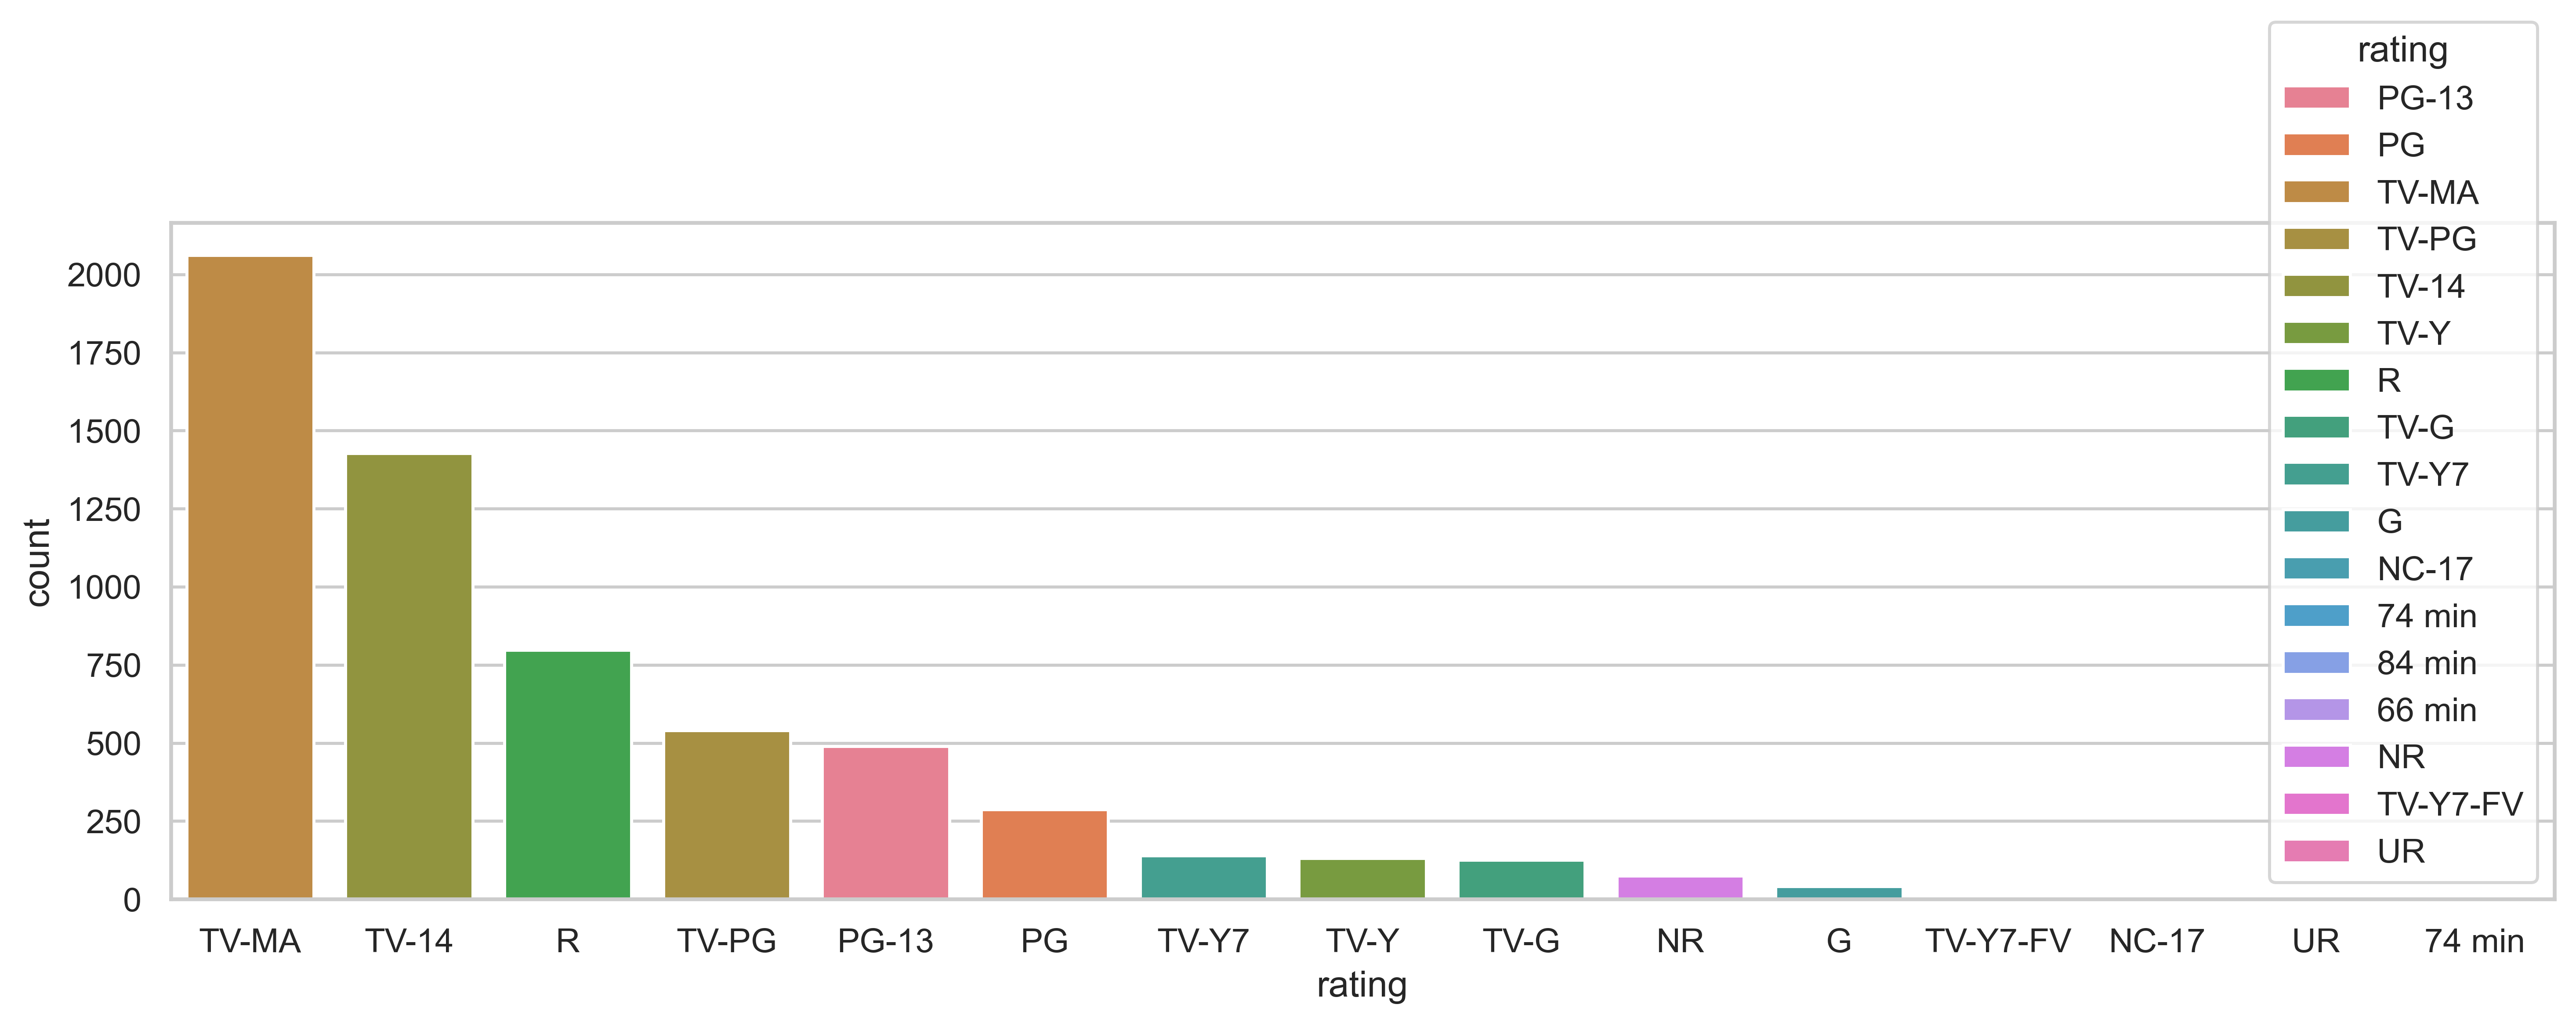

In [84]:
plt.figure(figsize=(14, 4), dpi=500)                                              # Set the size of the figure
sns.set_style('whitegrid')                                                        # Set the style of the plot
ax = sns.countplot(x="rating",  
                   data=netflix_movies,  
                   order=netflix_movies['rating'].value_counts().index[0:15], 
                   hue="rating")                                                  # Create the plot

# Analysing IMDB ratings to get top rated movies on Netflix

In [85]:
imdb_ratings = pd.read_csv('kaggle/IMDb_ratings.csv',
                           usecols=['weighted_average_vote'])          # Read the data
imdb_titles = pd.read_csv('kaggle/IMDb_movies.csv', 
                          usecols=['title','year','genre'])            # Read the data

ratings = pd.DataFrame({'Title': imdb_titles.title,
                        'Release Year': imdb_titles.year,
                        'Rating': imdb_ratings.weighted_average_vote,
                        'Genre': imdb_titles.genre})                   # Create the dataframe

ratings.drop_duplicates(subset=['Title','Release Year','Rating'], 
                        inplace=True)                                  # Drop the duplicates

In [88]:
ratings.dropna()                                                      # Drop the missing values
joint_data=ratings.merge(netflix_overall,
                         left_on='Title',
                         right_on='title',
                         how='inner')                                 # Merge the dataframes

joint_data=joint_data.sort_values(by='Rating', 
                                  ascending=False)                    # Sort the values

### Top rated 10 movies on Netflix

In [89]:
import plotly.express as px

In [91]:
top_rated = joint_data[0:10]                                        # Select the top 10
fig = px.sunburst(top_rated,
                  path=['title','country'],
                  values='Rating',
                  color='Rating')                                   # Create the plot
fig.show()                                                          # Show the plot

### Countries with highest rated content.

In [92]:
country_count = joint_data['country'].value_counts().sort_values(ascending=False)  # Count the number of movies in each country
country_count = pd.DataFrame(country_count)                                        # Create the dataframe
topcountries = country_count[0:11]                                                 # Select the top 10 countries
topcountries

,count
country,
United States,1379
India,705
United Kingdom,147
Canada,68
"United Kingdom, United States",66
Philippines,55
Turkey,46
France,45
South Korea,45


In [93]:
data = dict(number=[1063, 619, 135, 60, 44, 41, 40, 40, 38, 35], 
            country=["United States", "India", "United Kingdom", 
                     "Canada", "Spain",'Turkey',
                     'Philippines','France','South Korea','Australia'])          # Create the dictionary
fig = px.funnel(data, x='number', y='country')                                   # Create the plot
fig.show()                                                                       # Show the plot

### Year wise analysis

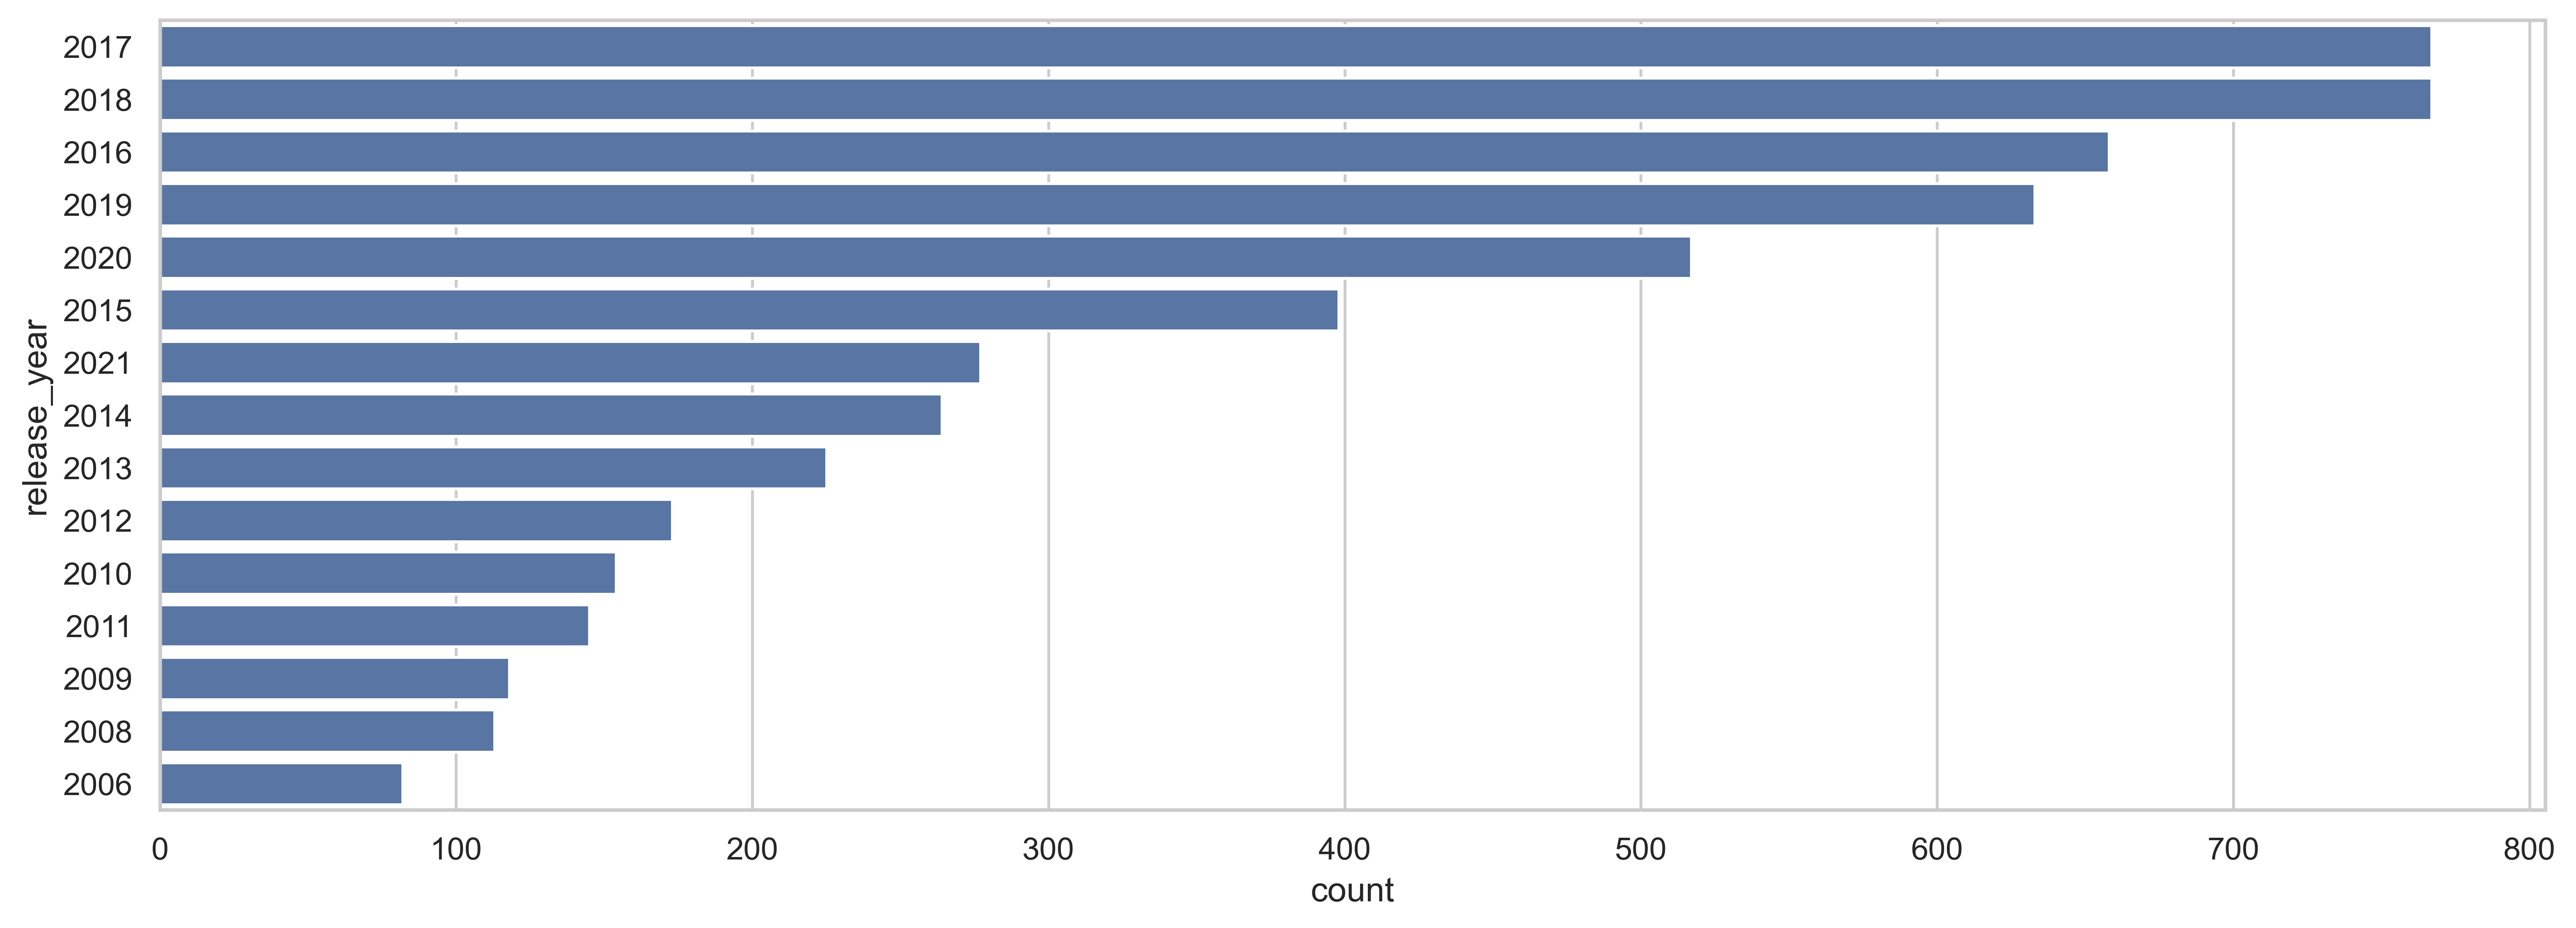

In [95]:
plt.figure(figsize=(15, 5), dpi=500)                                                  # Set the size of the figure
sns.set(style="whitegrid")                                                            # Set the style of the plot
ax = sns.countplot(y="release_year", 
                   data=netflix_movies, 
                   order=netflix_movies['release_year'].value_counts().index[0:15])   # Create the plot

In [96]:
countries = {}
netflix_movies['country'] = netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1

C:\Users\kozyr.DESKTOP-Q9L27AP\AppData\Local\Temp\ipykernel_17428\174174777.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [97]:
countries_fin = {}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}


### Top 10 movie content creating countries

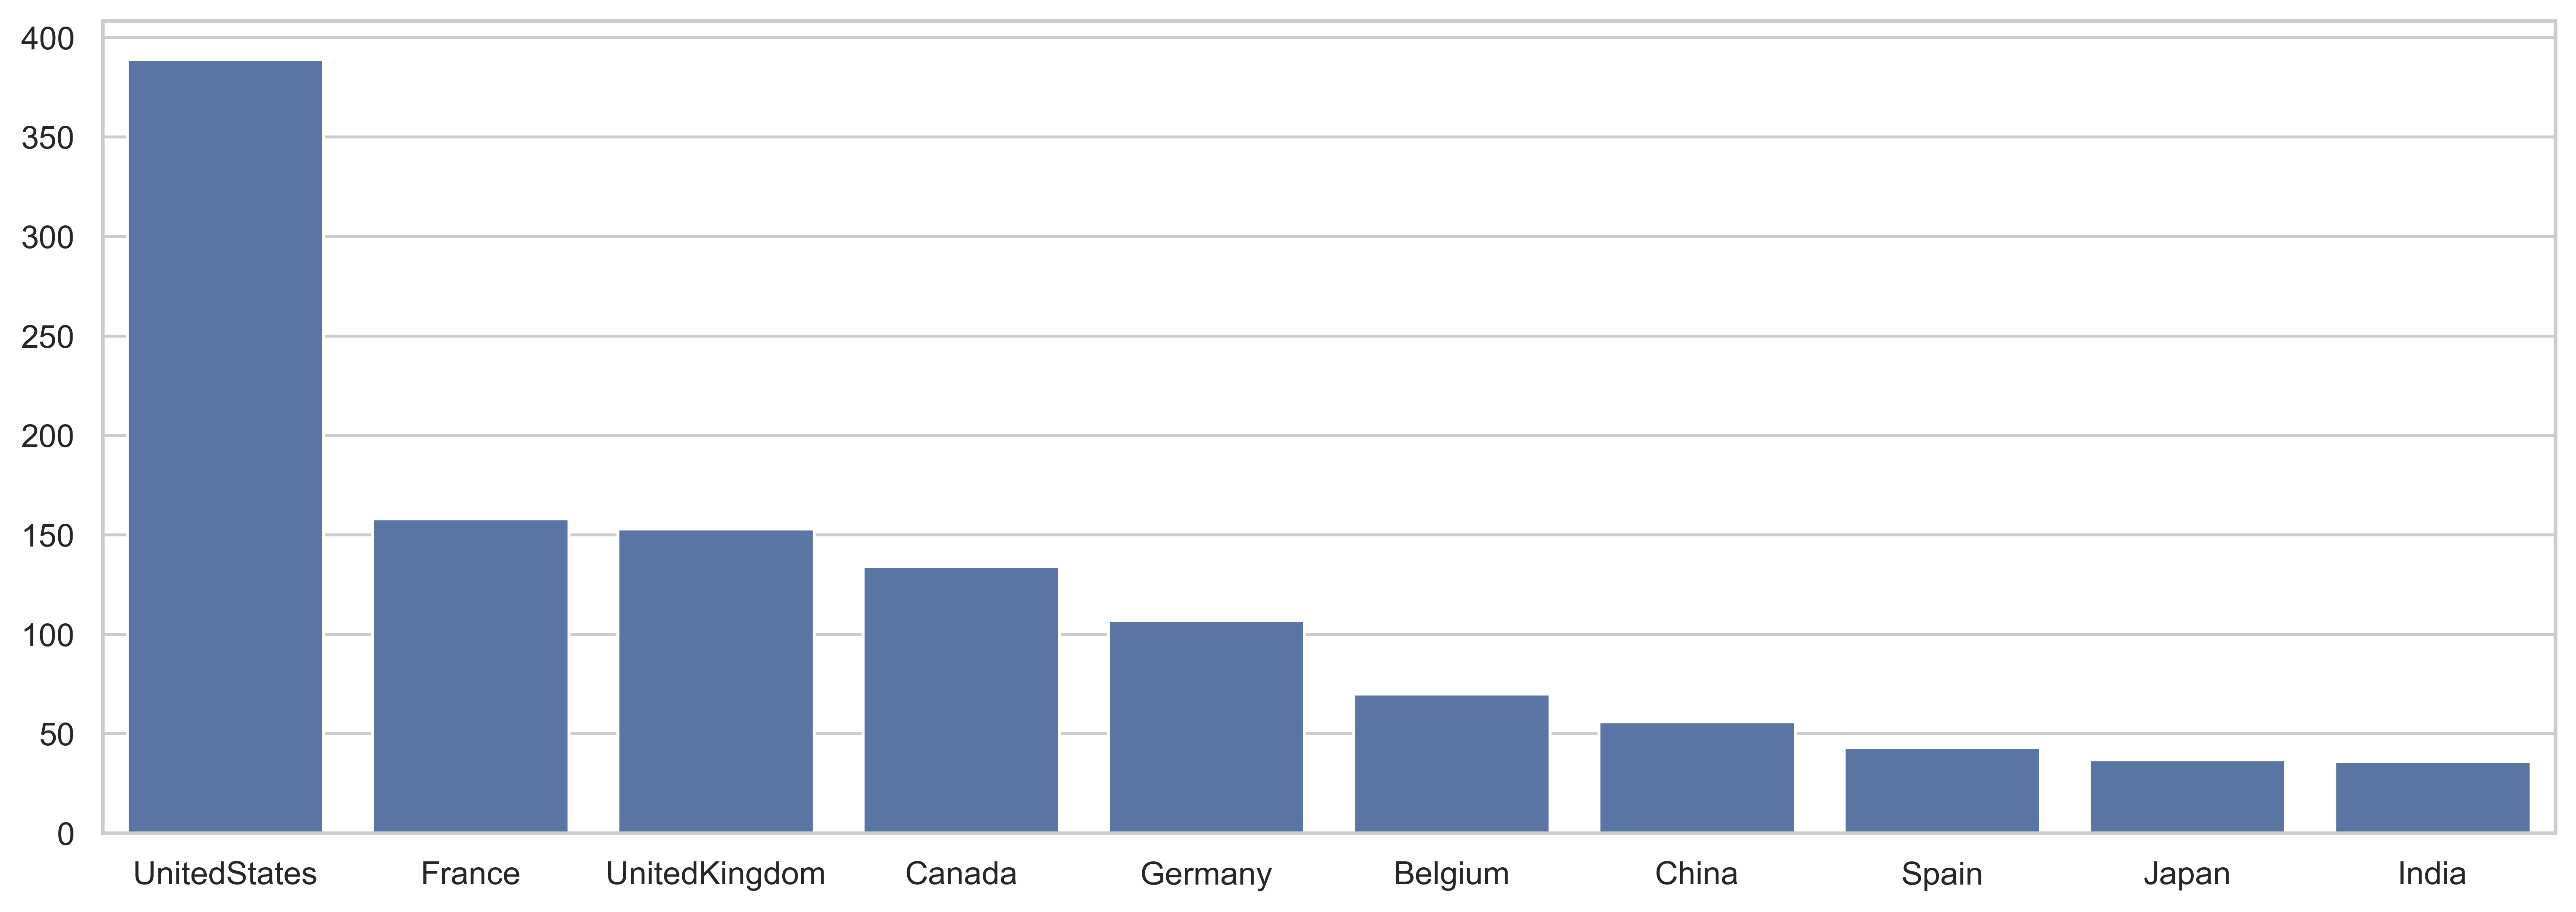

In [99]:
plt.figure(figsize=(15, 5), dpi=500)                                                 # Set the size of the figure
ax = sns.barplot(x=list(countries_fin.keys())[0:10], 
                 y=list(countries_fin.values())[0:10])                               # Create the plot

### Analysis of duration of movies

In [101]:
netflix_movies = netflix_movies.dropna()                                            # Drop the missing values
netflix_movies['duration'] = netflix_movies['duration'].str.replace(' min', '')     # Remove the 'min' from the duration

In [102]:
netflix_movies['duration']=netflix_movies['duration'].astype(str).astype(int)      # Convert the duration to integer

In [103]:
netflix_movies['duration'] 

6        91
7       125
9       104
12      127
13       91
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration, Length: 5518, dtype: int32

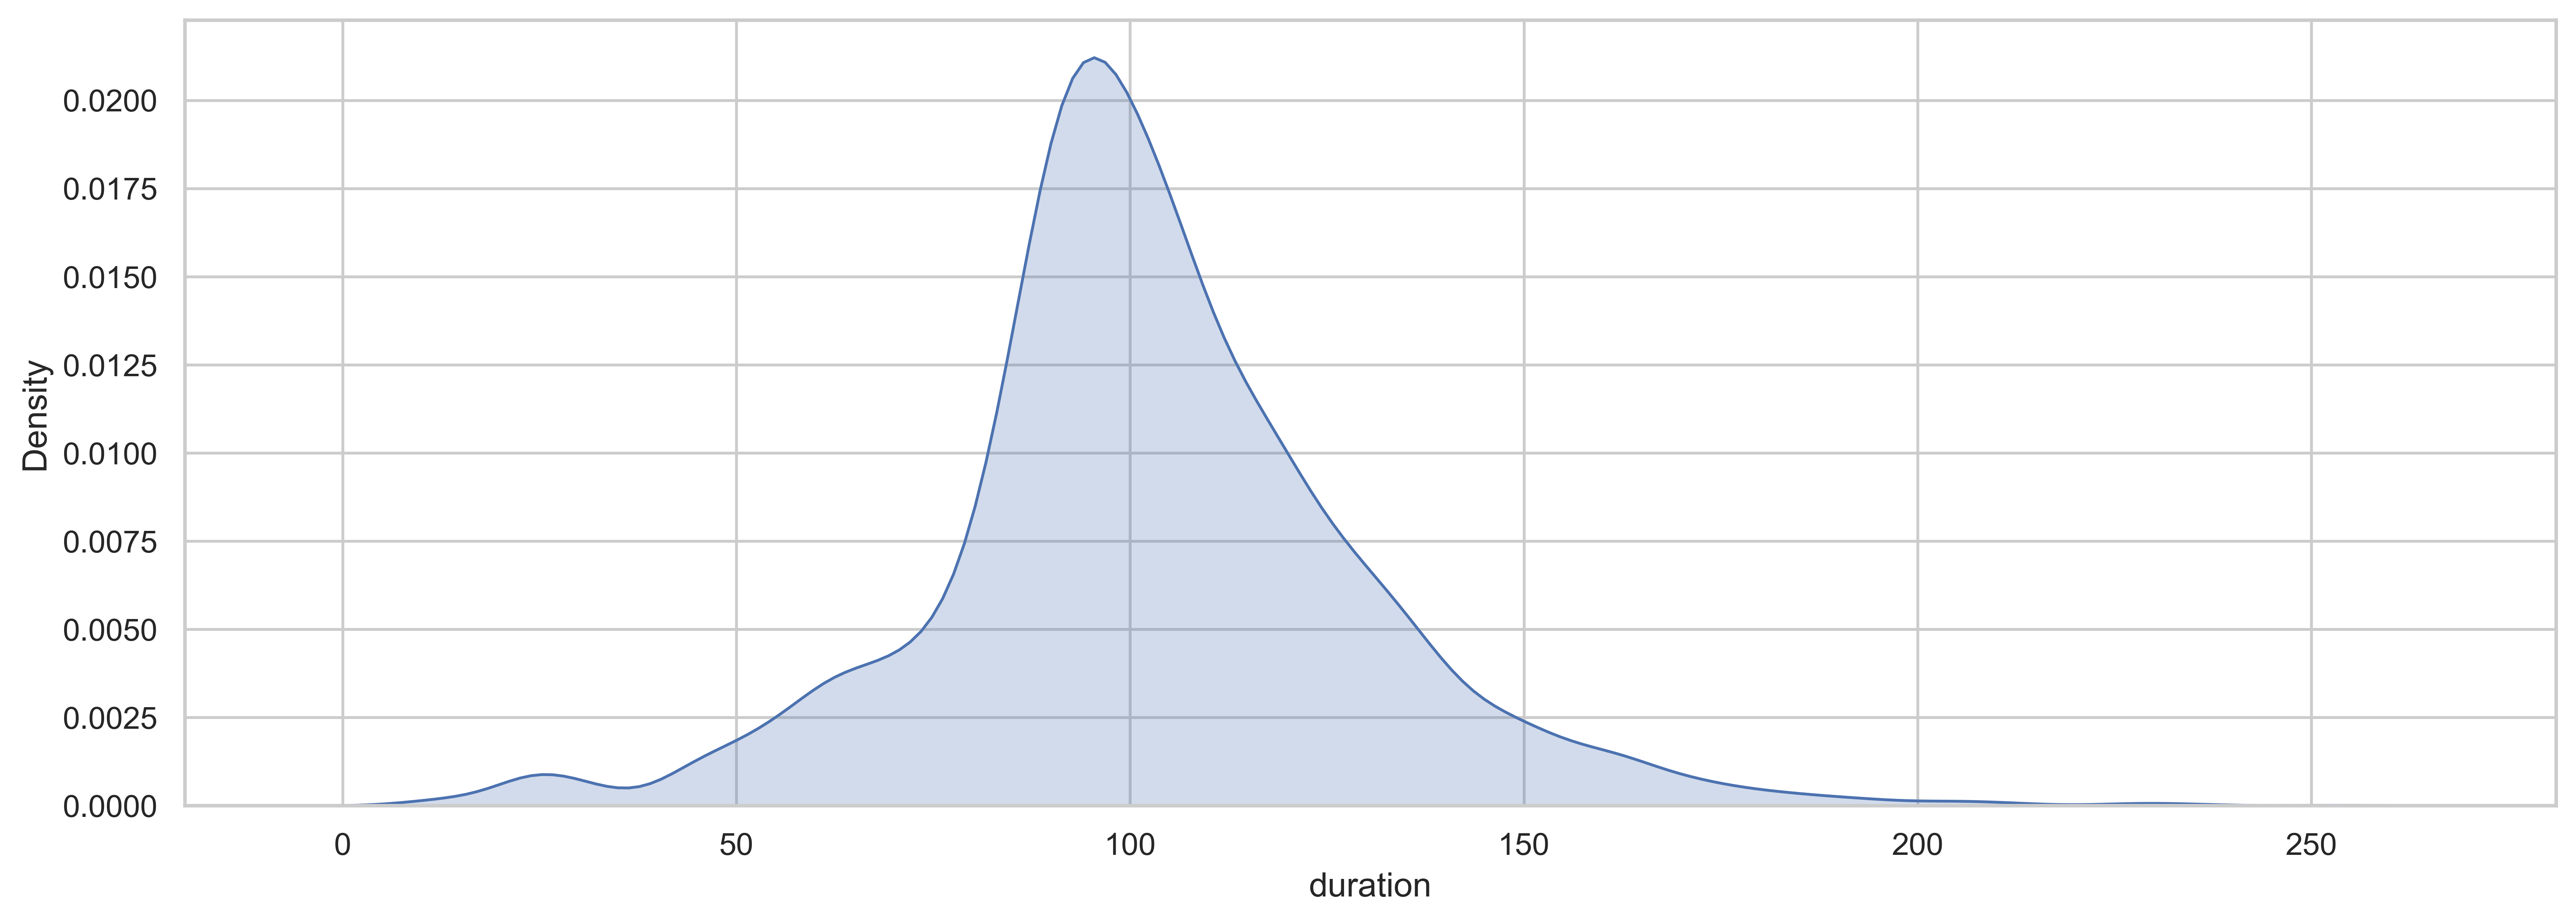

In [104]:
plt.figure(figsize=(15, 5), dpi=500)                                                # Set the size of the figure
sns.set(style="whitegrid")                                                          # Set the style of the plot
ax = sns.kdeplot(data=netflix_movies['duration'], 
                 fill=True)                                                         # Create the plot

# WordCloud for Genres.

In [108]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [109]:
genres = list(netflix_movies['listed_in']) 
gen = []

for i in genres:
    i = list(i.split(','))
    for j in i:
        gen.append(j.replace(' ', ""))
g = Counter(gen)

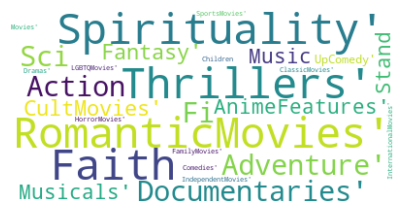

In [116]:
text = list(set(gen))                                                           # Create the text for the wordcloud
plt.figure(figsize=(5, 5), dpi=100)                                                 
wordcloud = WordCloud(max_words=1000000, 
                      background_color="white").generate(str(text))             # Create the wordcloud

plt.imshow(wordcloud,
           interpolation="bilinear")                                            # Show the plot
plt.axis("off")                                                                 # Remove the axis
plt.show()                                                                      # Show the plot

# Lollipop plot of Genres vs their count on Netflix

C:\Users\kozyr.DESKTOP-Q9L27AP\AppData\Local\Temp\ipykernel_17428\3135999209.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



Text(0.5, 1.0, 'Genres')

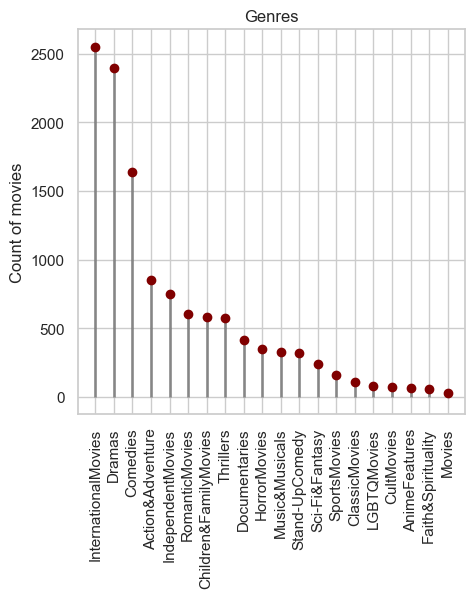

<Figure size 5000x5000 with 0 Axes>

In [123]:
g = {k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}

fig, ax = plt.subplots()

fig = plt.figure(figsize=(10, 10), dpi=500)
x, y = list(g.keys()), list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='dimgrey', alpha=0.7, linewidth=2)
ax.plot(x, y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count of movies")
ax.set_title("Genres")

# Analysis of TV SERIES on Netflix

In [124]:
countries1={}
netflix_shows['country']=netflix_shows['country'].fillna('Unknown')
cou1=list(netflix_shows['country'])
for i in cou1:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries1.keys()):
            countries1[i]+=1
        else:
            countries1[i[0]]=1
    else:
        for j in i:
            if j in list(countries1.keys()):
                countries1[j]+=1
            else:
                countries1[j]=1

C:\Users\kozyr.DESKTOP-Q9L27AP\AppData\Local\Temp\ipykernel_17428\38362248.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [125]:
countries_fin1={}
for country,no in countries1.items():
    country=country.replace(' ','')
    if country in list(countries_fin1.keys()):
        countries_fin1[country]+=no
    else:
        countries_fin1[country]=no
        
countries_fin1={k: v for k, v in sorted(countries_fin1.items(), key=lambda item: item[1], reverse= True)}


# Most content creating countries

Text(0, 0.5, 'Arrival delay (in minutes)')

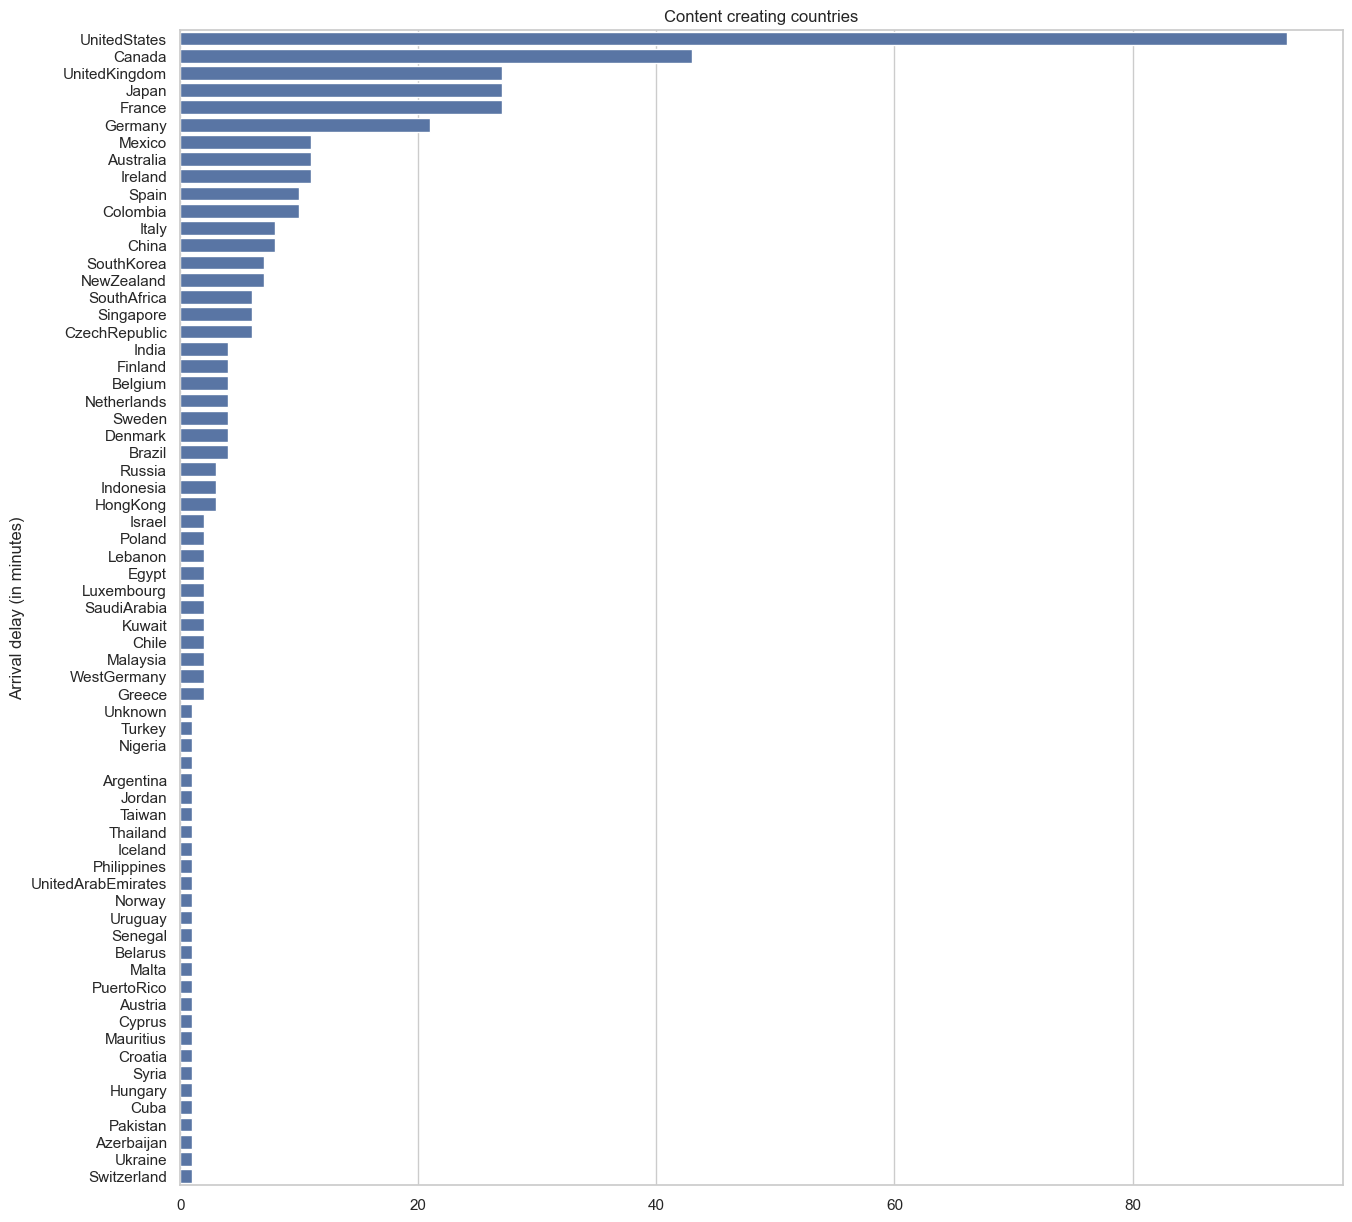

In [126]:
# Set the width and height of the figure
plt.figure(figsize=(15,15))

# Add title
plt.title("Content creating countries")

# Bar chart showing average arrival delay for Spirit Airlines flights by month
sns.barplot(y=list(countries_fin1.keys()), x=list(countries_fin1.values()))

# Add label for vertical axis
plt.ylabel("Arrival delay (in minutes)")

Naturally, United States has the most content that is created on netflix in the tv series category.

In [127]:
features=['title','duration']
durations= netflix_shows[features]

durations['no_of_seasons']=durations['duration'].str.replace(' Season','')

#durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)
durations['no_of_seasons']=durations['no_of_seasons'].str.replace('s','')

C:\Users\kozyr.DESKTOP-Q9L27AP\AppData\Local\Temp\ipykernel_17428\315267630.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\kozyr.DESKTOP-Q9L27AP\AppData\Local\Temp\ipykernel_17428\315267630.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [128]:
durations['no_of_seasons']=durations['no_of_seasons'].astype(str).astype(int)


C:\Users\kozyr.DESKTOP-Q9L27AP\AppData\Local\Temp\ipykernel_17428\1197540316.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



# TV shows with largest number of seasons

In [129]:
t=['title','no_of_seasons']
top=durations[t]

top=top.sort_values(by='no_of_seasons', ascending=False)

<Axes: xlabel='title'>

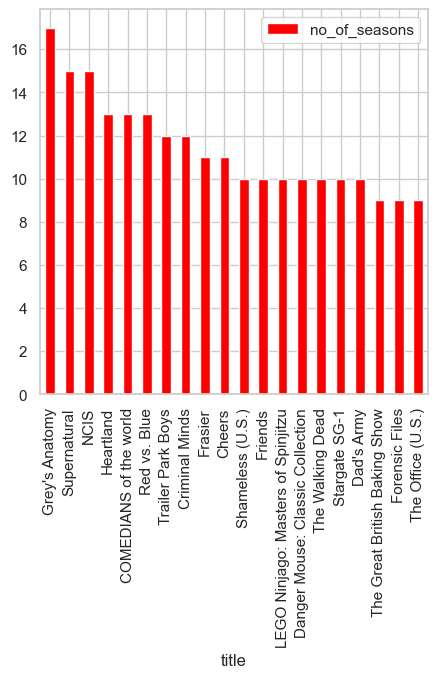

In [130]:
top20=top[0:20]
top20.plot(kind='bar',x='title',y='no_of_seasons', color='red')

Thus, NCIS, Grey's Anatomy and Supernatural are amongst the tv series that have highest number of seasons.

# Lowest number of seasons.

In [131]:
bottom=top.sort_values(by='no_of_seasons')
bottom=bottom[20:50]

import plotly.graph_objects as go

fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'No of seasons']),
                 cells=dict(values=[bottom['title'],bottom['no_of_seasons']],fill_color='lavender'))
                     ])
fig.show()

These are some binge-worthy shows that are short and have only one season.

In [132]:
genres=list(netflix_shows['listed_in'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

# Word Cloud for Genres

A word cloud is an image made of words that together resemble a cloudy shape.

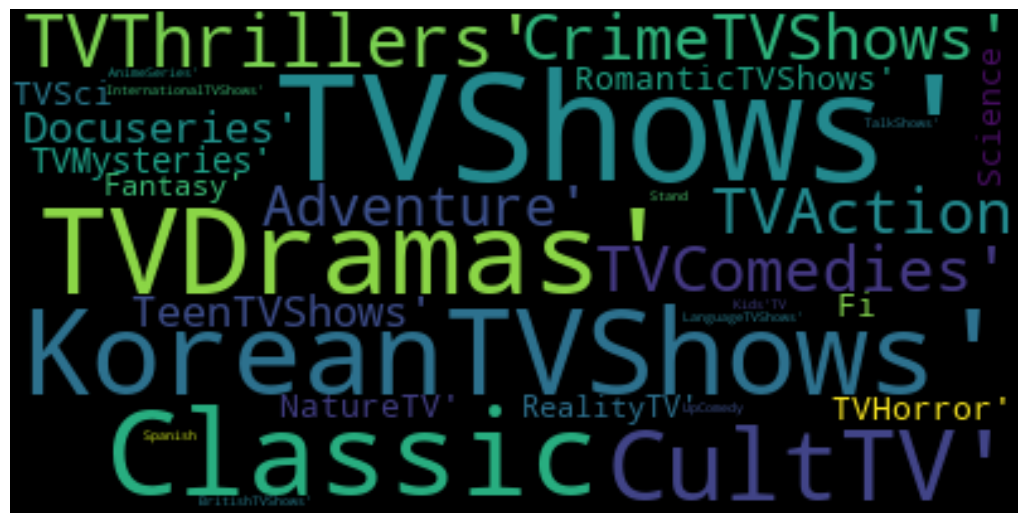

In [134]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

text = list(set(gen))

wordcloud = WordCloud(max_words=1000000,background_color="black").generate(str(text))
plt.rcParams['figure.figsize'] = (13, 13)
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [135]:
us_series_data=netflix_shows[netflix_shows['country']=='United States']

In [136]:
oldest_us_series=us_series_data.sort_values(by='release_year')[0:20]

In [137]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='paleturquoise'),
                 cells=dict(values=[oldest_us_series['title'],oldest_us_series['release_year']],fill_color='pink'))
                     ])
fig.show()

Above table shows the oldest US tv shows on Netflix.

In [138]:
newest_us_series=us_series_data.sort_values(by='release_year', ascending=False)[0:50]

In [139]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year'],fill_color='yellow'),
                 cells=dict(values=[newest_us_series['title'],newest_us_series['release_year']],fill_color='lavender'))
                     ])
fig.show()

The above are latest released US television shows!

# Content in France

In [140]:
netflix_fr=netflix_overall[netflix_overall['country']=='France']
nannef=netflix_fr.dropna()
import plotly.express as px
fig = px.treemap(nannef, path=['country','director'],
                  color='director', hover_data=['director','title'],color_continuous_scale='Purples')
fig.show()


It is very interesting to note that the content in France is very rational. There is no director in the data who has a large number of movies. In my opinion, it shows how different directors are given a chance to showcase their talents. What do you think?

In [141]:
newest_fr_series=netflix_fr.sort_values(by='release_year', ascending=False)[0:20]

In [142]:
newest_fr_series

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
91,s92,Movie,The Women and the Murderer,"Mona Achache, Patricia Tourancheau",NaN,France,"September 9, 2021",2021,TV-14,92 min,"Documentaries, International Movies",This documentary traces the capture of serial ...
1110,s1111,Movie,Madame Claude,Sylvie Verheyde,"Karole Rocher, Garance Marillier, Roschdy Zem,...",France,"April 2, 2021",2021,TV-MA,113 min,"Dramas, International Movies","In 1960s Paris, Madame Claude's influence exte..."
1329,s1330,Movie,The Misadventures of Hedi and Cokeman,Julien Royal,"Hedi Bouchenafa, Nassim Lyes, Fred Testot, Jul...",France,"February 10, 2021",2021,TV-MA,99 min,"Comedies, International Movies","In Paris, two dysfunctional dealers use family..."
1223,s1224,TV Show,Dealer,"Ange Basterga, Nicolas Lopez","Abdramane Diakité, Mohamed Boudouh, Sébastien ...",France,"March 10, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",Tensions erupt when two filmmakers infiltrate ...
1236,s1237,Movie,Sentinelle,Julien Leclercq,"Olga Kurylenko, Marilyn Lima, Michel Nabokoff,...",France,"March 5, 2021",2021,TV-MA,81 min,"Action & Adventure, Dramas, International Movies",Transferred home after a traumatizing combat m...
299,s300,Movie,The Swarm,Just Philippot,"Suliane Brahim, Sofian Khammes, Marie Narbonne...",France,"August 6, 2021",2021,TV-14,102 min,"Horror Movies, Independent Movies, Internation...",A single mother breeds locusts as high-protein...
273,s274,TV Show,Gone for Good,Juan Carlos Medina,"Finnegan Oldfield, Nicolas Duvauchelle, Guilla...",France,"August 13, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Dramas","Ten years after losing two loved ones, a man i..."
2797,s2798,TV Show,Vampires,NaN,"Oulaya Amamra, Suzanne Clément, Kate Moran, Mo...",France,"March 20, 2020",2020,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Horror","A Paris teen who's half human, half vampire gr..."
2675,s2676,TV Show,Fary : Hexagone,"Adrien Lagier, Ousmane Ly",Fary,France,"April 16, 2020",2020,TV-MA,2 Seasons,"International TV Shows, Stand-Up Comedy & Talk...",French comedy phenom Fary puts a playful spin ...
3433,s3434,TV Show,The Hook Up Plan,NaN,"Marc Ruchmann, Zita Hanrot, Sabrina Ouazani, J...",France,"October 11, 2019",2020,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...","When Parisian Elsa gets hung up on her ex, her..."


In [143]:
fig = go.Figure(data=[go.Table(header=dict(values=['Title', 'Release Year']),
                 cells=dict(values=[newest_fr_series['title'],newest_fr_series['release_year']]))
                     ])
fig.show()

# Top Duration

In [144]:
topdirs=pd.value_counts(netflix_overall['duration'])
fig = go.Figure([go.Bar(x=topdirs.index, y=topdirs.values , text=topdirs.values,marker_color='indianred')])
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

C:\Users\kozyr.DESKTOP-Q9L27AP\AppData\Local\Temp\ipykernel_17428\933839210.py:1: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.



It can be inferred that having one season is the most preferred duration.

## A little interesting history

Even though it may look like Netflix is fairly new, it has been around since 1997! 

Here's a picture of the older Netflix website when rentals costed only 50 cents each and the website had only about 900 titles.

![](https://producthabits.com/wp-content/uploads/2018/04/Screenshot-2018-03-26-16.08.07.png)

# Recommendation System (Content Based)

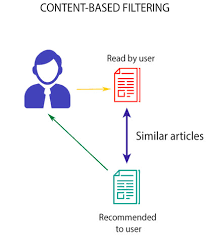

The TF-IDF(Term Frequency-Inverse Document Frequency (TF-IDF) ) score is the frequency of a word occurring in a document, down-weighted by the number of documents in which it occurs. This is done to reduce the importance of words that occur frequently in plot overviews and therefore, their significance in computing the final similarity score.

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [45]:
#removing stopwords
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
netflix_overall['description'] = netflix_overall['description'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(netflix_overall['description'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape


(7787, 17905)

There are about 16151 words described for the 6234 movies in this dataset.

Here, The Cosine similarity score is used since it is independent of magnitude and is relatively easy and fast to calculate.

<img src='https://i.stack.imgur.com/36r1U.png'>

In [46]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [47]:
indices = pd.Series(netflix_overall.index, index=netflix_overall['title']).drop_duplicates()

In [48]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

This recommendation is just based on the Plot.

In [49]:
get_recommendations('Peaky Blinders')

4692                    Our Godfather
4358                   My Stupid Boss
1807                              Don
6344                         The Fear
3219    Jonathan Strange & Mr Norrell
4953                Power Rangers Zeo
6783                       The Prison
6950                       The Tudors
6236                    The Con Is On
6585     The Legend of Michael Mishra
Name: title, dtype: object

In [50]:
get_recommendations('Mortel')

4858                  PILI Fantasy: War of Dragons
1920         Edgar Rice Burroughs' Tarzan and Jane
2159                             Figures of Speech
4314    My Entire High School Sinking Into the Sea
2188                                     FirstBorn
4994                                 Psychokinesis
608                                 At First Light
6958                          The Umbrella Academy
1267                                     Chamatkar
3864                              Maharakshak Devi
Name: title, dtype: object

It is seen that the model performs well, but is not very accurate.Therefore, more metrics are added to the model to improve performance.

# Content based filtering on multiple metrics

Content based filtering on the following factors:
* Title
* Cast
* Director
* Listed in
* Plot

Filling null values with empty string.

In [51]:
filledna=netflix_overall.fillna('')
filledna.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


Cleaning the data - making all the words lower case

In [52]:
def clean_data(x):
        return str.lower(x.replace(" ", ""))

Identifying features on which the model is to be filtered.

In [53]:
features=['title','director','cast','listed_in','description']
filledna=filledna[features]

In [54]:
for feature in features:
    filledna[feature] = filledna[feature].apply(clean_data)
    
filledna.head(2)

,title,director,cast,listed_in,description
0,3%,,"joãomiguel,biancacomparato,michelgomes,rodolfo...","internationaltvshows,tvdramas,tvsci-fi&fantasy",inafuturewheretheeliteinhabitanislandparadisef...
1,7:19,jorgemichelgrau,"demiánbichir,héctorbonilla,oscarserrano,azalia...","dramas,internationalmovies","afteradevastatingearthquakehitsmexicocity,trap..."


Creating a "soup" or a "bag of words" for all rows.

In [55]:
def create_soup(x):
    return x['title']+ ' ' + x['director'] + ' ' + x['cast'] + ' ' +x['listed_in']+' '+ x['description']

In [56]:
filledna['soup'] = filledna.apply(create_soup, axis=1)


From here on, the code is basically similar to the upper model except the fact that count vectorizer is used instead of tfidf.

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(filledna['soup'])

cosine_sim2 = cosine_similarity(count_matrix, count_matrix)

In [58]:
filledna=filledna.reset_index()
indices = pd.Series(filledna.index, index=filledna['title'])

In [59]:
def get_recommendations_new(title, cosine_sim=cosine_sim):
    title=title.replace(' ','').lower()
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return netflix_overall['title'].iloc[movie_indices]

In [60]:
get_recommendations_new('PK', cosine_sim2)

100                            3 Idiots
6585       The Legend of Michael Mishra
552                   Anthony Kaun Hai?
2571                             Haapus
5377                              Sanju
5954                   Taare Zameen Par
1261                    Chal Dhar Pakad
1271                    Chance Pe Dance
1831                            Dostana
1988    EMI: Liya Hai To Chukana Padega
Name: title, dtype: object

In [61]:
get_recommendations_new('Peaky Blinders', cosine_sim2)

2419                                   Giri / Haji
6374                   The Frankenstein Chronicles
6693                         The Murder Detectives
3692                                        Loaded
3412                                 Kiss Me First
2616                                  Happy Valley
2381                                      Get Even
2846    How to Live Mortgage Free with Sarah Beeny
2886                                 I AM A KILLER
3013                      Inside the Criminal Mind
Name: title, dtype: object

In [62]:
get_recommendations_new('The Hook Up Plan', cosine_sim2)

2168                                        Find Yourself
1590                                       Dancing Angels
4024                     Melodies of Life - Born This Way
3676                                        Little Things
1435    Club Friday To Be Continued - My Beautiful Tomboy
5219                                           Rishta.com
38                                    แผนร้ายนายเจ้าเล่ห์
294                                  Accidentally in Love
720                                     Bangkok Bachelors
1463                                      College Romance
Name: title, dtype: object

# How many Netflix Shows/ Movies are made from books as their storylines?

For a detailed book recommendation system with both content and collaborative filtering click :
    [Book Recommendation, EDA](https://www.kaggle.com/niharika41298/netflix-or-books-recommender-analysis-eda)

In [63]:
books=pd.read_csv('/kaggle/input/goodbooks-10k/books.csv')
books['original_title']=books['original_title'].str.lower()
x=netflix_overall
x['title']=x['title'].str.lower()
t=x.merge(books, left_on='title', right_on='original_title', how="inner")

In [64]:
t.shape

(289, 35)

In [65]:
import plotly.graph_objects as go

labels = ['Shows from books','Shows not from books']
values = [248,6234]

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()